# PASO 1: Preparación de los datos
<hr>

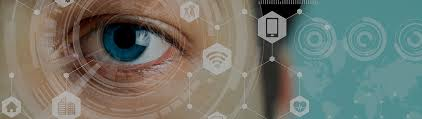

Deberíamos estudiar en este momento, 

- ¿qué tipo de estructura de datos tengo?, 
- ¿son todas las columnas interesantes?, 
- para entender mejor el dato ¿debo renombrar las columnas para que sean más explicativas?
- hay medidas que no son correctas (final en N), reemplazar por otros valores
- ¿qué datos/conjunto de ellos voy a utilizar? y establecer unos objetivos


## 1.1 Cargamos los datos en un DataFrame
<hr>

Los datos los vamos a cargar en un dataframe ya que nos permite tener las etiquetas de las columnas de los datos y ademas podemos realizar operaciones globales sobre estos de forma cómoda

In [1]:
#IMPORTAMOS TODAS LAS LIBRERÍAS QUE VAMOS A NECESITAR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import scipy
import seaborn as sns
import pylab
import scipy.stats as stats
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn import preprocessing as pp
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

dataframe = pd.read_csv("meteo_calidad_2015.csv", sep = ";")
dataframe.head()

,Dia,Dia_mes,Mes,Dia_sem,Lluvia,T_MAX,T_MIN,Viento_MAX,Viento_MED,SO2,...,NO_MAX,NO2_MAX,PM2.5_MAX,PM10_MAX,O3_MAX,TOL_MAX,BEN_MAX,EBE_MAX,TCH_MAX,NMCH_MAX
0,1,1,ENE,J,0.0,10.7,-0.6,14,5,14.1,...,244,127,33,64,20,9.1,3.9,1.9,2.44,1.00
1,2,2,ENE,V,0.0,12.5,-0.4,11,5,15.4,...,327,165,23,36,22,11.5,4.0,2.4,2.31,0.92
2,3,3,ENE,S,0.0,11.7,1.4,14,8,13.7,...,301,143,22,30,24,12.8,3.6,2.1,2.43,0.93
3,4,4,ENE,D,0.0,14.4,1.4,12,6,14.2,...,270,141,20,33,32,11.9,3.5,2.6,2.24,0.92
4,5,5,ENE,L,0.0,12.3,2.0,19,9,12.4,...,248,123,22,31,25,9.9,3.1,2.4,2.31,0.94


In [2]:
print('Cantidad de Filas y columnas:',dataframe.shape)
print('Nombre columnas:',dataframe.columns)

Cantidad de Filas y columnas: (365, 33)
Nombre columnas: Index(['Dia', 'Dia_mes', 'Mes', 'Dia_sem', 'Lluvia', 'T_MAX', 'T_MIN',
       'Viento_MAX', 'Viento_MED', 'SO2', 'CO', 'NO', 'NO2', 'PM2.5', 'PM10',
       'O3', 'TOL', 'BEN', 'EBE', 'TCH', 'NMCH', 'SO2_MAX', 'CO_MAX', 'NO_MAX',
       'NO2_MAX', 'PM2.5_MAX', 'PM10_MAX', 'O3_MAX', 'TOL_MAX', 'BEN_MAX',
       'EBE_MAX', 'TCH_MAX', 'NMCH_MAX'],
      dtype='object')


In [3]:
dataframe.describe()

,Dia,Dia_mes,Lluvia,T_MAX,T_MIN,Viento_MAX,Viento_MED,SO2,CO,NO,...,NO_MAX,NO2_MAX,PM2.5_MAX,PM10_MAX,O3_MAX,TOL_MAX,BEN_MAX,EBE_MAX,TCH_MAX,NMCH_MAX
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,...,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,183.000000,15.720548,0.733425,22.132329,11.662192,31.512329,14.219178,6.857169,0.367045,26.721811,...,67.465753,64.909589,13.961644,28.654795,66.449315,6.381918,1.773699,1.051507,1.711425,0.518164
std,105.510663,8.808321,3.072213,9.014460,6.863840,11.648373,4.877754,2.399113,0.167508,34.352470,...,74.124428,25.007472,6.995183,13.377702,24.815490,4.324128,0.829483,0.922538,0.177494,0.353152
min,1.000000,1.000000,0.000000,3.500000,-1.500000,10.000000,4.000000,3.777778,0.180000,2.333333,...,8.000000,26.000000,4.000000,8.000000,16.000000,0.900000,0.300000,0.100000,1.330000,0.080000
25%,92.000000,8.000000,0.000000,14.500000,6.400000,23.000000,11.000000,5.200000,0.260000,6.291667,...,22.000000,47.000000,9.000000,19.000000,47.000000,3.700000,1.200000,0.400000,1.620000,0.240000
50%,183.000000,16.000000,0.000000,21.400000,11.300000,31.000000,14.000000,6.000000,0.310000,11.125000,...,35.000000,59.000000,13.000000,26.000000,69.000000,5.200000,1.600000,0.700000,1.690000,0.400000
75%,274.000000,23.000000,0.000000,29.500000,17.100000,39.000000,17.000000,7.800000,0.420000,30.333333,...,79.000000,76.000000,17.000000,35.000000,85.000000,7.500000,2.300000,1.300000,1.780000,0.770000
max,365.000000,31.000000,26.600000,39.900000,26.000000,75.000000,28.000000,15.600000,0.990000,168.000000,...,337.000000,165.000000,40.000000,95.000000,134.000000,29.100000,4.700000,5.600000,2.440000,1.690000


## 1.2 Filtrado. ¿Son todas las columnas interesantes?
<hr>

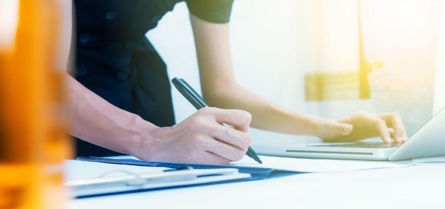
Para poder contestar a esta pregunta necesitamos primero modelar una definición de nuestro problema que nos permita entender los atributos y poder diferenciar cuales van a ser los atributos a precedir y cuales serán los usados para ello.

Una posible definición global del problema es la siguiente:

**```   PROBLEMA A RESOLVER   ```**
> **PREDECIR LA CALIDAD DEL AIRE EN BASE A UNOS PARÁMETROS**

En esta definición podemos ver claramente dos partes:
>1. **```Parametros de calidad del aire```**: En este grupo debemos meter de todos los atributos presentes aquellos que esten relacionados con la calidad del aire. Estos son claramente todos los compuestos químicos (C0, Tol, ...)

>2. **```Parametros predictores```**: En este grupo englobaremos el resto de atributos restantes

Con esta diferenciación de los atributos en dos grupos podemos ahora pasar a realizar un primer filtro sobre ellos donde veamos cuales nos pueden resultadar útiles y cuales no.

**Parametros calidad del aire**

```Estudio```: para realizar este filtrado lo que necesitamos saber sobre que elementos de los que disponemos (NO2, CO, ...) son los que realmente las *Agencias estatales de Medio Ambiente* utilizan para calcular el índice de calidad del aire. 

Las variables que se toman para indicar la calidad del aire son las siguientes:

>+ **PM2.5** (particulas < 2.5 microns)
+ **PM10**: (patriculas < 10 microns)
+ **O3**: (ozono)
+ **SO2**: (dióxido de axufre)
+ **NO2**: (dióxido de nitrógeno)
+ **CO**: (monóxido de carbono)

**Parámetros predictores (meteorológicos + temporales)**

Aquí (según expertos) la **temperatura**, el **viento** y la **lluvia** son atributos válidos para predecir la calidad del aire. 

El atributo prescindible es el "*Dia del Mes*" ya que los atributos del "*Mes*" y el "*Día de la semana*" ya nos aportan suficiente información sobre como puede afectar la fecha a la calidad del aire.

>Con esto ya hemos realizado un *primer filtrado lógico*.

>Con los análisis estadísticos que se realizarán más tarde se va a buscar conseguir reducir más estas listas de atributos. Incluso, es factible que realicemos una transformación de los atributos de manera que dos atributos se combinen en uno, que se discreticen valores..

## 1.3 ¿Renombrar las columnas?
<hr>

Las columnas tienen nombres identificativos/significativos, por lo que no procedemos a su modificación.

En caso necesario:

        dataframe.rename(columns={"A": "a", "B": "b", "C": "c"}, errors="raise")

## 1.4 Determinar el conjunto de datos que se va a utilizar y establecer unos objetivos
<hr>

>Hemos dividido nuestros atributos y los hemos limpiado, pero tenemos un grupo de variables a precedir en vez de una, por lo que debemos hacer posteriores selecciones hasta que nos quedemos con uno de ellos o con varios de ellos y que realicemos una combinación algebraica de los mismos.

>Para ello nuestro primer paso sera ver por separado que tal explican los atributos predictores a cada uno de los atributos de calidad del aire. De manera que eliminaremos aquellos atributos de calidad del aire que no puedan ser explicados por ninguno de nuestros atributos predictores. Tras esto seleccionariamos el atributo de calidad del aire que se puede explicar mejor con nuestro atributos predictores.

# PASO 2: Analisis de los datos y Modelos de regresión
<hr>
Analizar y entender bien los datos.

El primer paso para analizar un conjunto de datos consiste en aplicar las medidas cuantitativas de la estadística descriptiva, comenzando con el análisis univariado y pasando después al multivariado

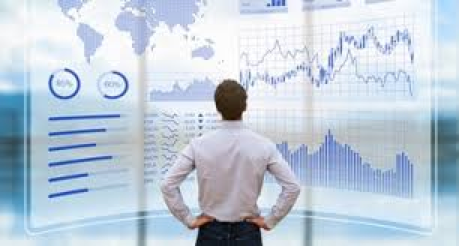

## 2.1 Análisis y entendimiento de los datos
<hr>

### 2.1.1 Análisis descriptivo de los datos
<hr>

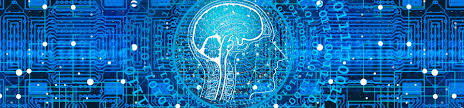

Hacemos un **análisis estadístico inicial** que servirá para obtener una primera impresión de los datos, así como para descartar posibles incoherencias y errores en los mismos. 


In [4]:
pd.set_option('display.max_columns', 50)
print(dataframe.describe())

              Dia     Dia_mes      Lluvia       T_MAX       T_MIN  Viento_MAX  \
count  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000   
mean   183.000000   15.720548    0.733425   22.132329   11.662192   31.512329   
std    105.510663    8.808321    3.072213    9.014460    6.863840   11.648373   
min      1.000000    1.000000    0.000000    3.500000   -1.500000   10.000000   
25%     92.000000    8.000000    0.000000   14.500000    6.400000   23.000000   
50%    183.000000   16.000000    0.000000   21.400000   11.300000   31.000000   
75%    274.000000   23.000000    0.000000   29.500000   17.100000   39.000000   
max    365.000000   31.000000   26.600000   39.900000   26.000000   75.000000   

       Viento_MED         SO2          CO          NO         NO2       PM2.5  \
count  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000   
mean    14.219178    6.857169    0.367045   26.721811   40.967784   11.590000   
std      4.877754    2.3991

*Analizamos la información*
>A simple vista, los valores descriptivos obtenidos para cada uno de los atributos están dentro de lo esperado. 

>Sin embargo, si nos fijamos en la lluvia, se puede observar cómo la distribución de los cuartiles nos muestra información relevante. Si nos fijamos, los valores de comienzo de todos los cuartiles son cero. Esto puede deberse a que realmente el clima es muy seco o que los datos se muestran en unidades grandes y al ser redondeados parece que no ha habido lluvia cuando en realidad si tuviesemos una unidad más pequeña si que veríamos valores.

Realizamos un *boxplot* para ver más en detalle la distribución de los datos de la lluvia:

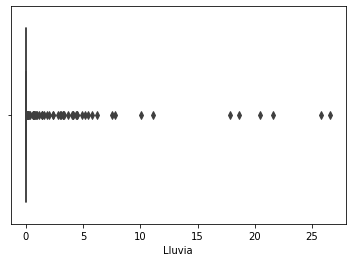

In [5]:
%matplotlib inline
seaborn.boxplot(dataframe['Lluvia'])
plt.show()

Vemos el anterior *boxplot*, que donde la caja no se llega a representar debido a la alta frecuencia del valor 0, por ello existe una gran cantidad de **outliers** que se corresponden con los pocos días de lluvia en Madrid.

### 2.1.2 DISTRIBUCIÓN DE T_MAX, T_MIN y Viento_MAX
<hr>

A modo de ejemplo, ```para estudio del alumno``` vamos a determinar el grado de similitud de la temperatura máxima a
una distribución normal
- Skewness y Kurtosis
- Histograma
- Q-Q Plot

#### T_MAX
<HR>

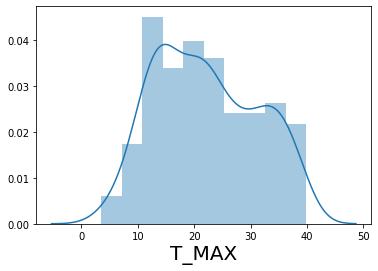

La asimetría de la temperatura máxima es: 0.21100078042584186
La curtosis de la temperatura máxima es: -1.0126479509613964


In [6]:
temperatures_max = dataframe['T_MAX']
               
b = sns.distplot(temperatures_max, bins=10)
b.set_xlabel("T_MAX",fontsize=20)
b.tick_params(labelsize=10)
plt.show()

print('La asimetría de la temperatura máxima es: '+str(scipy.stats.skew(temperatures_max)))
print('La curtosis de la temperatura máxima es: '+str(scipy.stats.kurtosis(temperatures_max)))

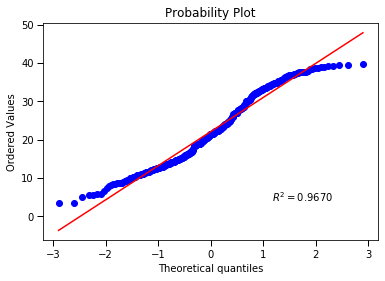

In [7]:
plt.tick_params(length=6, width=1, grid_alpha=0.1)
stats.probplot(temperatures_max, dist="norm", plot=plt, rvalue=True)
pylab.show()

> ```Nota```: tras haber observado el histograma con la función de ajuste a la que se parece la distribución, haber obtenido el *skewness* y *kurtosis*, y por último haber realizado el Q-Q Plot, podemos inferir que la distribución de los datos intenta parecerse a una normal, pero no podemos afirmarlo contundentmente. La principal razón por la que no se ajusta a una distribución normal pura, es que contiene una curtosis negativa, lo que nos indica que las colas de la distribución normal están vacías generando así los escalones de caída que vemos en ambos extremos de la distribución. Dichos extremos del histograma se corresponden con las desviaciones horizontales en los extremos del Q-Q Plot.

```CONCLUIMOS``` en este aspecto que la población puede que siga una distribución normal pero que nuestra muestra no es concluyente. 

#### T_MIN
<HR>

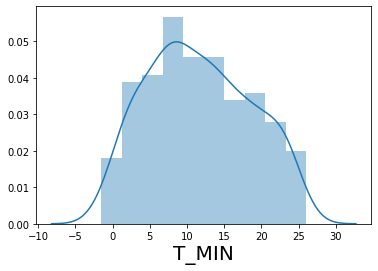

La asimetría de la temperatura mínima es: 0.16145560439210072
La curtosis de la temperatura mínima es: -0.9718862358939164


In [8]:
temperatures_min = dataframe['T_MIN']
               
b = sns.distplot(temperatures_min, bins=10)
b.set_xlabel("T_MIN",fontsize=20)
b.tick_params(labelsize=10)
plt.show()

print('La asimetría de la temperatura mínima es: '+str(scipy.stats.skew(temperatures_min)))
print('La curtosis de la temperatura mínima es: '+str(scipy.stats.kurtosis(temperatures_min)))

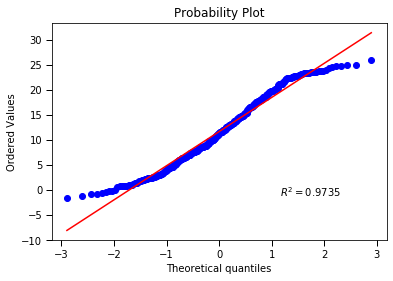

In [9]:
plt.tick_params(length=6, width=1, grid_alpha=0.1)
stats.probplot(temperatures_min, dist="norm", plot=plt, rvalue=True)
pylab.show()

```CONCLUIMOS```........

#### Viento_MAX
<hr>

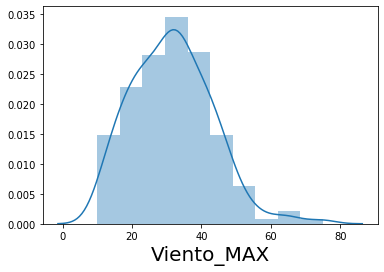

La asimetría de Viento_MAX es: 0.5297534844290885
La curtosis de Viento_MAX es: 0.5352035808451832


In [10]:
viento_max = dataframe['Viento_MAX']
               
b = sns.distplot(viento_max, bins=10)
b.set_xlabel("Viento_MAX",fontsize=20)
b.tick_params(labelsize=10)
plt.show()

print('La asimetría de Viento_MAX es: '+str(scipy.stats.skew(viento_max)))
print('La curtosis de Viento_MAX es: '+str(scipy.stats.kurtosis(viento_max)))

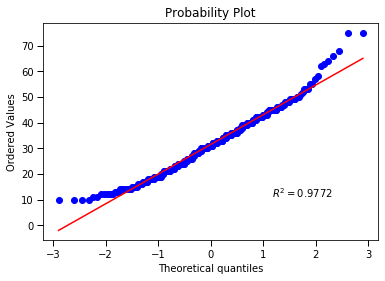

In [11]:
plt.tick_params(length=6, width=1, grid_alpha=0.1)
stats.probplot(viento_max, dist="norm", plot=plt, rvalue=True)
pylab.show()

```CONCLUIMOS``` ....

## 2.2 Análisis de Correlaciones
<HR>
    
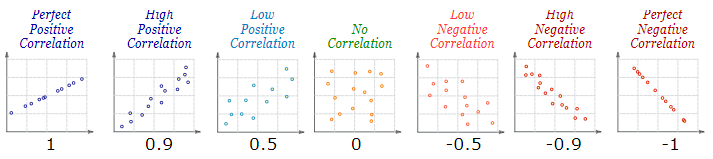

### 2.2.1 Representación de CO con respecto a T_MAX
<hr>

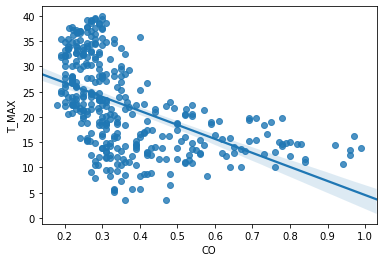

In [12]:
ax = plt.subplot()
sns.regplot(dataframe["CO"],dataframe["T_MAX"])
ax.set_xlabel("CO")
ax.set_ylabel("T_MAX")
plt.show()

```ANÁLISIS DE LA GRÁFICA:``` 

podemos ver la variable T_MAX explica a la variable CO con una relación exponenial negativa. 

Lo que nos indica que las temperaturas bajas se corresponden con niveles de CO bajos, de manera que un pequeño decremento de esta implica un gran aumento del CO. En cambio a temperaturas altas tenemos bajas tasas de CO, en las que una pequeña variación de la temperatura implica una muy poca variación del CO. 
Lo que hay que destacar es que hay una zona entre los valores en el rango x = [0,0.45] & y = [0,8] que vemos que esos datos no respetan la tendencia explicada. Lo que esta ocurriendo es interesante porque si nos fijamos este conjunto tiene valores de temperatura que no llegan a representarse en la tendencia explicada anteriormente ya que la curva se estabiliza antes de llegar a ellos. La conclusión por tanto es que por debajo de este valor necesitaríamos más datos para ver si hay un comportamiento distinto y en ese caso a lo mejor sería interesante separar los datos segun este umbral y tratrarlos con otra tendencia.

### 2.2.1 Representación de O3 con respecto a T_MAX
<hr>

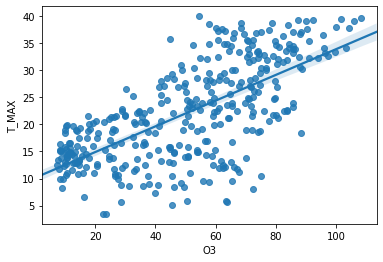

In [14]:
ax = plt.subplot()
sns.regplot(dataframe["O3"],dataframe["T_MAX"])
ax.set_xlabel("O3")
ax.set_ylabel("T_MAX")
plt.show()

```ANÁLISIS DE LA GRÁFICA:``` 

En este caso la temperatura explica de forma linealmente positiva la presencia de O3 en el aire. Si que es cirto que si bien se ve una cierta tendencia lineal, la correlación es muy baja ya que la nube de puntos esta muy dispersa. Es por esto que consideramos que T_MAX explica mejor el CO que el O3

### 2.2.3 Matriz de Correlaciones
<hr>

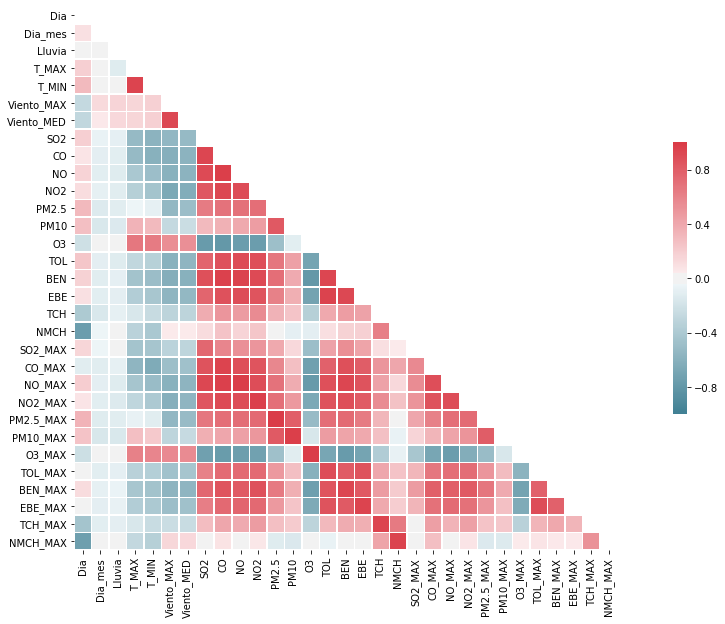

In [15]:
correlation_matrix = dataframe.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=1,vmin=-1, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

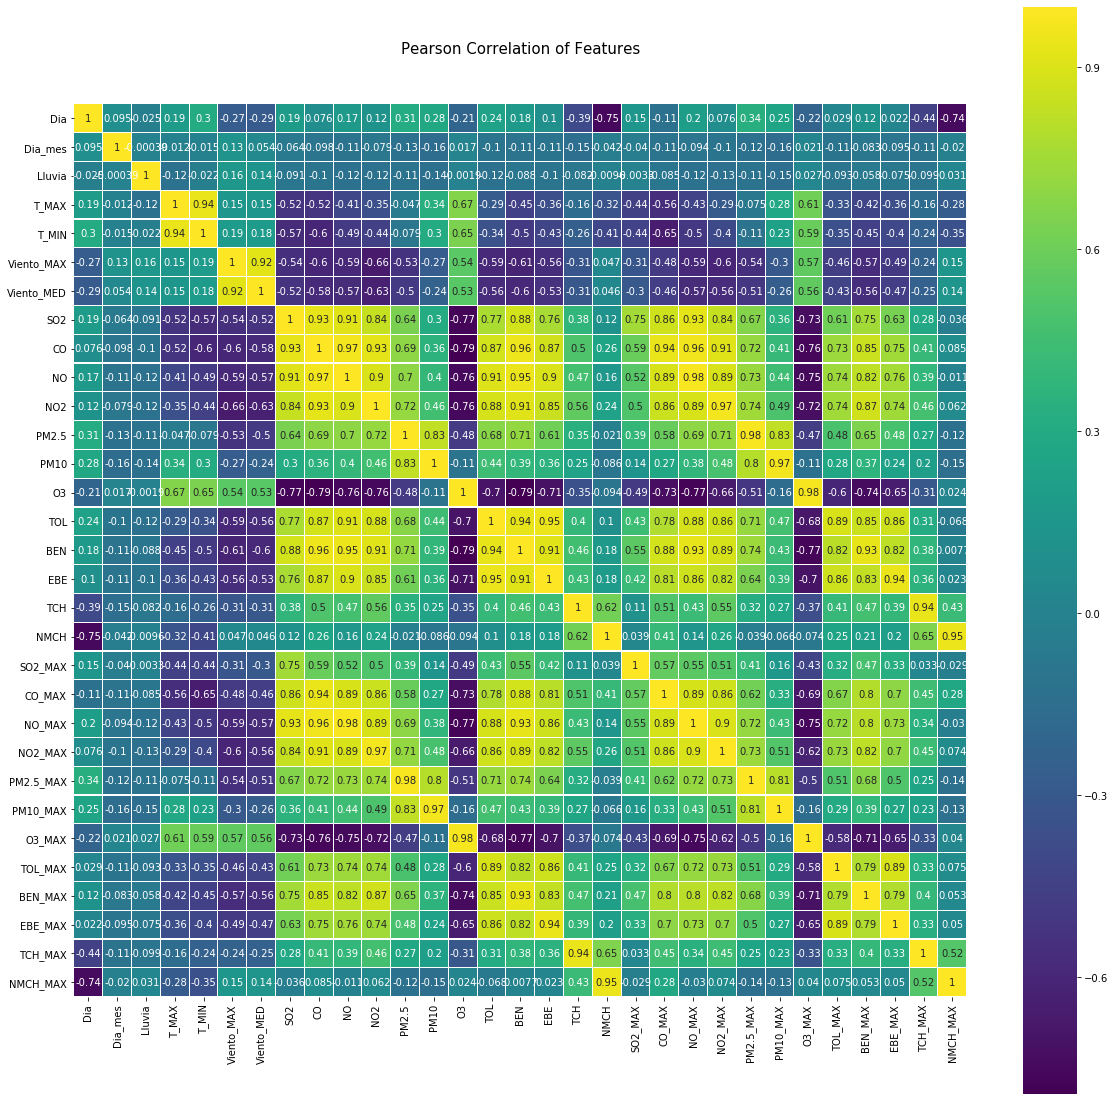

In [25]:
colormap = plt.cm.viridis
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(dataframe.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

#### ANALISIS

En estudios previos, comentábamos laa eliminación determinados atributos ya que no aportaban información relevante para el problema. 

Como se puede ver el gráfico presenta **dos secciones perfectamente diferenciadas**. 
>La **primera** sección es la que compara los **atributos predictores** enunciados anteriormente **con** los atributos de **calidad del aire**,

>La **segunda** compara los **atributos de calidad del aire entre ellos**. 

Se puede aprecia que:

>La **primera** región tiene **correlaciones muy bajas en comparación con la segunda**. 

>Además estas correlaciones tienen **tendencias negativas en la primera y positivas en la segunda**.

Esto nos indica que los **atributos de calidad de aire estan muy relacionados entre si** y que por tanto la presencia de uno implicara la presencia del otro. 

Esto se resumne en que **hay redundancia** entre ellos, por lo que a la hora de decidir que atributo usar **para predecir** podemos ceñirnos a escoger **aquel que se pueda explicar mejor con nuestro atributos predictores**.

Un análisis mas axhaustivo, nos permite ver que:

+ **O3 - Comportamiento inverso**: Anteriormente hemos comentado que todos los atributos de calidad del aire tenian un correlacion positiva fuerte entre ellas y negativa con los atributos predictores. Pues bien el ozono presenta un comportamiento totalmente inverso. Respecto a las variables meteorológicas, el ozono guarda una correlación positiva. En concreto la temperatura es la que está más correlada positivamente con el ozono. Es decir, *a mayor temperatura, mayores son los niveles de ozono*. Esto se debe a que el ozono es un gas producido por un conjunto de reacciones químicas en las que interviene la luz solar. Para tener luz solar, se necesita la presencia del Sol, lo que conlleva un aumento de las temperaturas como bien muestran los datos. La correlación negativa del ozono con elementos como el NO, NO2, SO2 y CO se debe a que el ozono es un gas que ayuda a eliminar los elementos contaminantes. Su desaparición supondría el aumento del metano, monóxido de carbono y óxidos de nitrógeno en la atmósfera. Existen dos tipos de ozono: el troposférico y el estratosférico (conocidos como malo y bueno respectivamente), siendo el primero de los dos el que se ha recogido en los datos (debido a la altura a la que se encuentran cada uno de los dos gases).
+ **NMCH - Unica correlacion**: En este caso estre atributo podemos ver que no presenta correlación con ninguno del resto de atributos, exceptuando los días del año. Con este tiene una correlacion negativa, lo que nos indica el nivel de este componente baja a lo largo del año. La explicación que se puede dar para justificar que no haya correlación ninguna de los hidrocarburos no metánicos (NMCH) con las demás variables, necesitaría de una opinión experta, pues nuestras búsquedas no han aclarado la falta de relación de esta variable con las demás. La aparición de hidrocarburos debida a la actividad del hombre, está relacionada con el uso de disolventes en las fábricas y en la naturaleza el metano es el mayor representante de este tipo de compuestos.
+ **Lluvia - Contra expectativas**: Si al principio de la práctica nos hubiesen preguntado de entre estas tres variables: *LLUVIA*, *TEMPERATURA* y *VIENTO*, cual era la que más influye en la calidad del aire, hubiesemos apostado por la *LLUVIA*, en cambio como estamos viendo en la matriz esta variable explica muy poco nuestros parámetros de calidad. **Si que es cierto que para estar totalmente seguros de esto deberíamos ver el diagrama de dispersión ya que a lo mejor presenta una tenedencia no lineal con ellos.**
+ **Temperatura:** Podemos ver que con las temeperaturas hay una correlación con todos los atributos de calidad del aire, veamos que indica esto. Lo primero de todo ambas variables (T_MIN, T_MAX) estan negativamente correladas, esto nos está diciendo que menores temperaturas tenemos mayor contaminación y viceversa. Esto tiene todo el sentido del mundo ya que en invierno es cuando se encienden las calefacciones y esto es lo que genera mayor contaminación.

#### ¿VARIABLES CATEGORICAS?

Por último podemos ver que en esta matriz solo tenemos representados las correlaciones entre los atributos numéricos, nos faltan los atributos de *MES* y *DIA DE LA SEMANA*  que son categóricos, para ello tenemos varias opciones, analicemos cada una de ellas y veamos sus limitaciones:

- **Transformar nuestras clases a coeficientes numéricos** y calcular la correlación como antes: es aplicable si nuestras varaibles categóricas tuviesen dos clases solamente, con más clases este calculo deja de funcionar correctamente.
- **Visualizar diagramas de cajas**: podríamos realizar una traducción entre diagramas de caja y diagramas de dispersión y que por tanto una correlación lineal que se vea en el diagrama de dispersión se reflejará en el diagrama de cajas (cajas una encima de otra --> correlación positiva, y viceversa). Pero, el problema en este caso, es que tenemos un atributo con 12 categorías lo que hace muy incómodo la visualización de este diagrama. Y además deberíamos visualizar este diagrama de cajas de 12 clases para todos los atributos del problema.
- **Test Estadístico (```ANOVA```)**: la opción mas viable es usar un test estadístico, de manera que usaremos el valor resultante de probabilidad que nos de el modelo estadístico para determinar si hay correlación o no. 

Este test busca diferencias significativas en las medias de distitnos grupos basandose en las varianzas entre grupos y la varianzas dentro de los grupos (**Analisis of Variance**).

La hipotesis nula que plantea es que las medias son iguales. Esto aplicado a nuestro problema se resume en: 

- Los grupos son los que generan nuestro atributo categórico en base al atributo numérico con el que se quiere comparar.
- El hecho de que las medias sean distintas, es decir, que no se pase el test estadísitco (medias distintas), consideraremos que la variable independiente tiene influencia en la dependiente y por ello que hay  de correlación.
   
El único **inconveniente** que podemos encontrar utilizando con **ANOVA** es que al ser este un **método parámetrico**, necesita que las **variables tengan una distribución normal**, y las clases formadas por las variables categóricas tengan una **varianza homogénea**. 

Por otro lado, en caso de que algún atributo incumpla alguna de estas condiciónes, el **test no se verá tan afectado si tenemos la misma cantidad de datos en todas las clases**, **para estos dos atributos se verifica**, ya que todos los meses tienen la misma cantidad de días mas o menos, y un año tiene también la misma cantidad de días de la semana.
Calculamos los resultados del test ```KRUSKAL-WALLIS``` para las dos variables categóricas con respecto al resto de atributos numéricos

In [21]:
# MESES DEL AÑO
atributes = list(dataframe.columns)
atributes.remove('Dia_sem')
atributes.remove('Mes')
month_results = np.arange(len(atributes),dtype="float")
for i,col in enumerate(atributes):
    fValue,month_results[i] = stats.kruskal(dataframe[col][dataframe['Mes'] == 'ENE'],
                                     dataframe[col][dataframe['Mes'] == 'FEB'],
                                     dataframe[col][dataframe['Mes'] == 'MAR'],
                                     dataframe[col][dataframe['Mes'] == 'ABR'],
                                     dataframe[col][dataframe['Mes'] == 'MAY'],
                                     dataframe[col][dataframe['Mes'] == 'JUN'],
                                     dataframe[col][dataframe['Mes'] == 'JUL'],
                                     dataframe[col][dataframe['Mes'] == 'AGO'],
                                     dataframe[col][dataframe['Mes'] == 'SEP'],
                                     dataframe[col][dataframe['Mes'] == 'OCT'],
                                     dataframe[col][dataframe['Mes'] == 'NOV'],
                                     dataframe[col][dataframe['Mes'] == 'DIC'])
month_results = list(map(lambda x: 1-x,month_results))

In [22]:
# DIAS DE LA SEMANA
day_results = np.arange(len(atributes),dtype="float")
for i,col in enumerate(atributes):
    fValue,day_results[i] = stats.kruskal(dataframe[col][dataframe['Dia_sem'] == 'L'],
                                     dataframe[col][dataframe['Dia_sem'] == 'M'],
                                     dataframe[col][dataframe['Dia_sem'] == 'X'],
                                     dataframe[col][dataframe['Dia_sem'] == 'J'],
                                     dataframe[col][dataframe['Dia_sem'] == 'V'],
                                     dataframe[col][dataframe['Dia_sem'] == 'S'],
                                     dataframe[col][dataframe['Dia_sem'] == 'D'])
day_results = list(map(lambda x: 1-x,day_results))

```KRUSKAL-WALLIS```

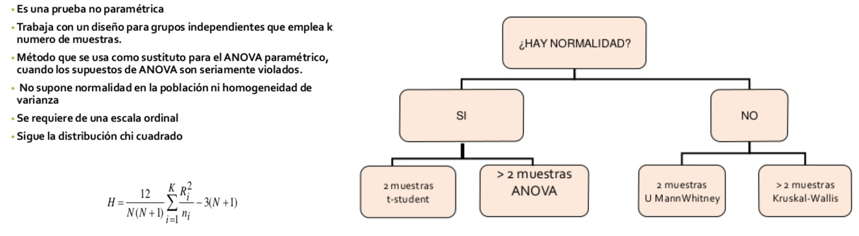

>La prueba de Kruskal-Wallis (*de William Kruskal y W. Allen Wallis*) es un método **no paramétrico** para probar si un grupo de datos proviene de la misma población. Intuitivamente, es idéntico al ANOVA con los datos reemplazados por categorías. 

>Ya que es una prueba no paramétrica, la prueba de Kruskal-Wallis **no asume normalidad en los datos**, en oposición a ANOVA. 

>La prueba de Kruskal-Wallis es una prueba no paramétrica, y se utiliza cuando no se cumplen los supuestos del ANOVA unidireccional. Tanto la prueba de Kruskal-Wallis como el ANOVA unidireccional evalúan las diferencias significativas en una variable dependiente continua mediante una variable independiente categórica (con dos o más grupos). En el ANOVA, suponemos que la variable dependiente está normalmente distribuida y que hay una varianza aproximadamente igual en los puntajes entre los grupos. Sin embargo, cuando se utiliza la prueba de Kruskal-Wallis, no tenemos que hacer ninguna de estas suposiciones. Por lo tanto, la prueba de Kruskal-Wallis se puede usar para variables dependientes tanto continuas como ordinales. Sin embargo, como la mayoría de las pruebas no paramétricas, la prueba de Kruskal-Wallis no es tan poderosa como la ANOVA.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html

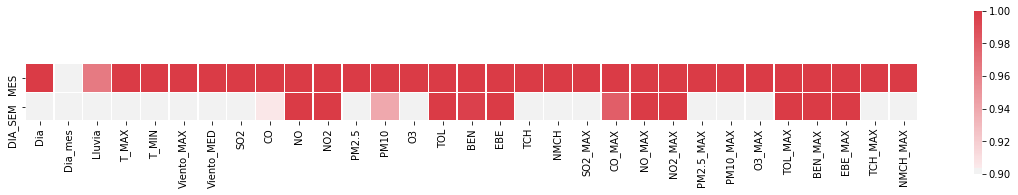

In [24]:
# Transformamos los resultados a dataframe para poder realizar la gráfica
month_results = pd.DataFrame(month_results,index = atributes,columns = ["MES"])
day_results = pd.DataFrame(day_results,index = atributes,columns = ["DIA_SEM"])

cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.subplots(figsize=(20,6))
cat_num_corr = pd.concat([month_results,day_results],axis=1)
sns.heatmap(cat_num_corr.transpose(), cmap=cmap, vmax=1,vmin=0.9, center=0.9,square=True, linewidths=.5, cbar_kws={"shrink": .5})

En este diagrama estamos representando el resultado del test ```KRUSKAL-WALLIS```. 

Realmente aqui hay un detalle a aclarar y es que si recordamos resultados de test por debajo de 0.05, es decir, no se pasa la hipótesis nula, implica que hay correlación ya que como comentamos anteriormente se ve que las medias entre los grupos son significativamente diferentes y por tanto esto quiere decir que la varaible independiente está influyendo en la dependiente. 

Teniendo esto en cuenta valores muy cercanos a 0 implicarán correlación (esta será más fuerte cuanto mayor sea el valor). 

Y valores mayores que 0 implicarán que no hay correlación. Esto resulta contraintuitivo según el análisis que hemos realizado hasta ahora con Pearson. Es por ello que para poder interpretar estros resultados igual que hasta ahora, hemos invertido los valores que nos da el test con la siguiente operación: **1 - resultado**, de manera que ya tenemos los valores más altos como alta correlación, y los más bajos como baja correlación (igual que con Pearson), haciendo asi el entendimiento del gráfico más sencillo.

Como podemos ver la variable **MES** se encuentra altamente correlada con todos los atributos meteorológicos. 
> El clima en España tiene bien diferenciados los meses de lluvia, los de calor/frío y viento. Además de esto vemos que está correlado con todos los compuestos químico. Esto es lógico y tiene una doble explicación:
+ **Transitividad:** Lo primero de todo, hemos visto como los atributos meteorológicos estaban realcionados con el MES. Teniendo en cuenta que los atributos meteorológicos nos sirven para explicar la presencia de estos compuestos químicos, podemos establecer transitivamente que el MES esta correlado con estos atributos.
+ **Actividad Industrial:** Si bien la explicación anterior teoricamente suena bastante bien, en la práctica estamos viendo que los atributos meteorológicos están bastante limitados para precedir estos compuestos, ya que son capaces de explicar pocos de ellos, y no en gran medida. Entonces ¿cuál es la razón de que se encuentre el MES tan correlado con todos los compuestos químicos?. La única posibilidad es que estos compuestos tengan ciertos meses donde se producen en mayor medida. Estos meses probablemente serán los que las industrias principales que generaran cada compuesto tengan mayor actividad. Esta conclusión debería contrastarse con expertos en el tema, de manera que analicemos a fondo que agente produce cada compuesto, y miremos en que momento del año se manifiesta más fuertemente ese agente.

En cuanto a la variable **DIA_SEM** podemos ver que no se encuentra correlada con ningún atributo meteorológico, lo cual es lógica ya que realmente el día de la semana no influye en nada para ningún atributo de estos. Por otro lado este atributo se encuentra muy correlado con ciertos los compuestos químicos, lo cual también tiene sentido ya que los días de diario es cuando todas las fábricas estan en funcionamiento (emitiendo más compuestos químicos) y todo el mundo se mueve para ir al trabajo lo que también genera más emisiones.

*KRUSKAL-WALLIS SOLO NO ES SUFICIENTE*: 
+ Si bien KRUSKAL-WALLIS nos ha servido para ver si las medias son o no iguales (variables correladas o no) estadisticamente hablando. La información que no nos da es en caso de no serlo cual es la clase que esta difiriendo del resto para ello serían necesarios análisis POST-HOC. Esto no lo vamos a hacer por no extendernos demasiado en este apartado.
+ Al igual que con el coeficiente de correlación de Pearson, el resultado del test nos indica si hay correlación o no, pero no que tipo de correlación tenemos (*lineal, logarítmica, polinómica*). Con el coeficiente de correlación de Pearson, utilizábamos el diagrama de dispersión, en este caso lo que mejor se ajusta es el diagrama de cajas. Mediante el cual podríamos ver según las alturas de las cajas cual es la relación entre los atributos.

Con esto hemos podido analizar las correlaciones entre variables numéricas-numéricas y categórico-númericas. 

>Realmente nos **falta una correlación por realizar** y es entre nuestras **variables categóricas "MES" y "Dia_sem"**. Para esto necesitaríamos un tercer test, en este caso **CHI-CUADRADO**. En este caso la interpretación sería más sencilla ya que la hipósteis nula de este test es que las variables son independientes y la hipóstesis de contraste que son dependientes. De manera que un resultado del test por debajo de 0.05 nos indicara que estas son dependientes (correladas) y valores por encima, que no lo están. 

### 2.2.4 Atributos más correlados con NO2
<hr>

Nos centramos en los atributos predictores. 

Si visualizamos en la matriz de correlaciónes anteriormente realizada podemos ver que los dos atributos que están más claramente correlados linealmente son el *VIENTO* Y *VIENTO_MAX*. 

No obstante si queremos detectar correlaciones no lineales deberemos analizar los diagramas de dispersión. 

Si nos fijamos por otro lado en las variables categóricas podemos ver que ninguna de las dos se encuentra correlada con este atributo.

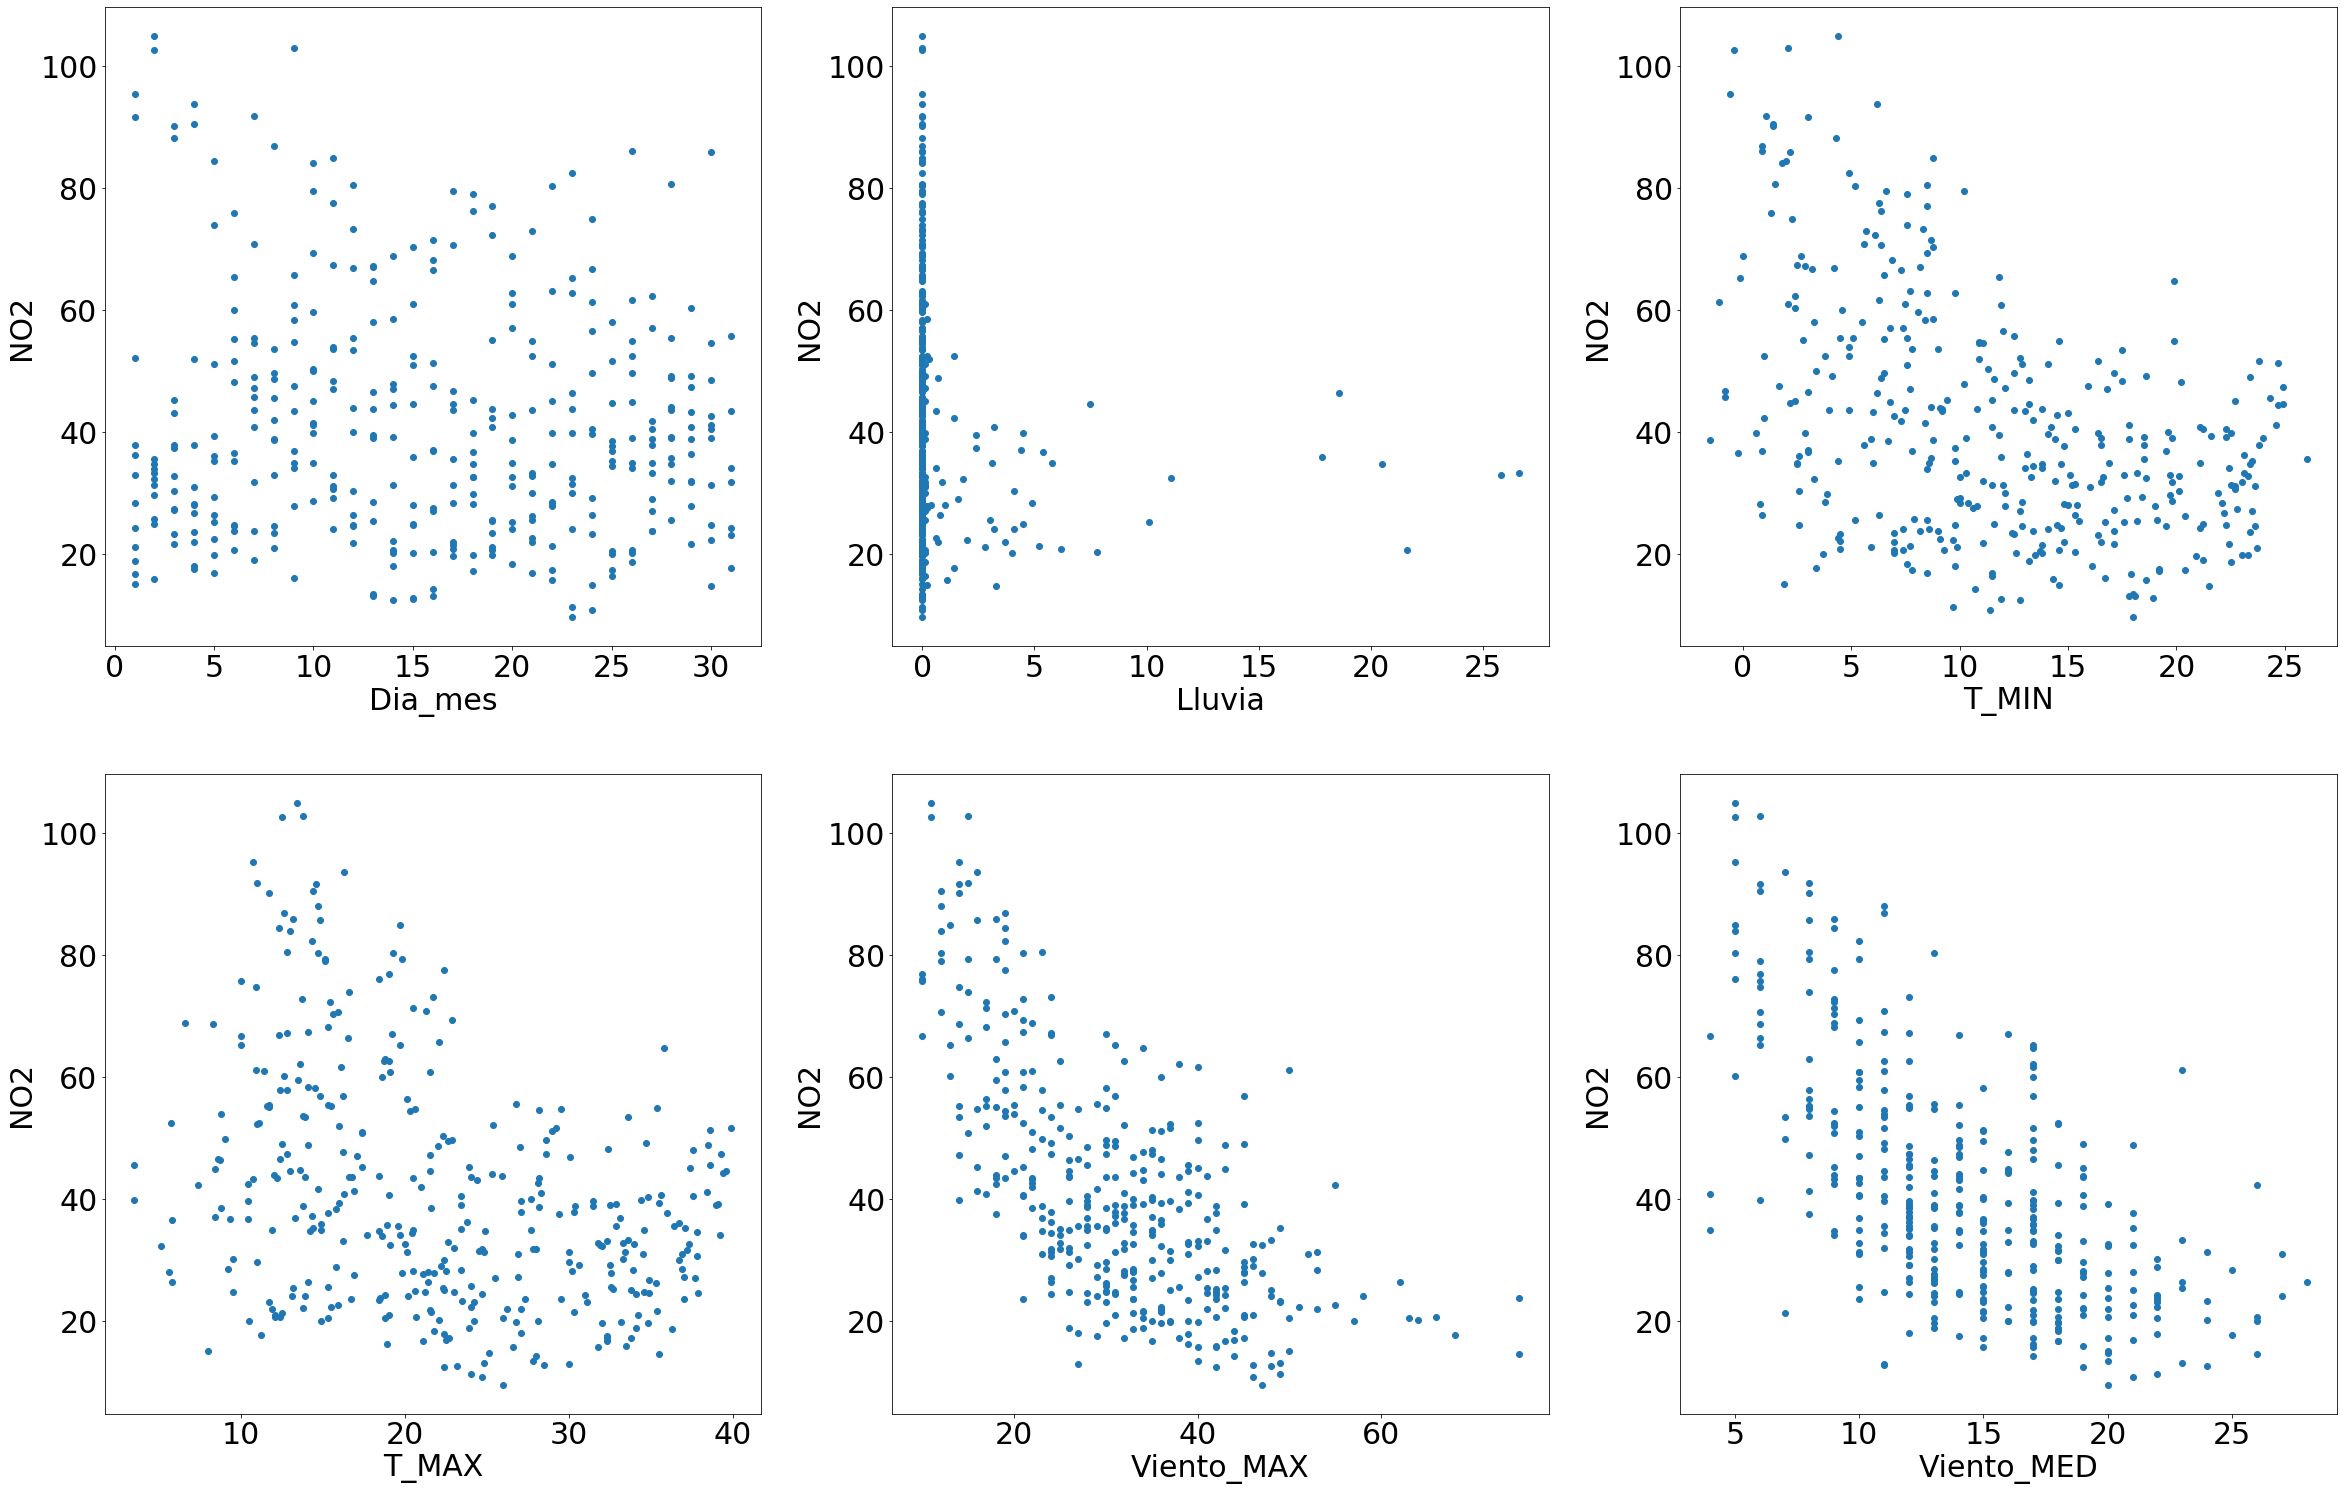

In [27]:
plt.figure(figsize=(40, 40))
plt.rcParams['axes.labelsize']=30
plt.rcParams['xtick.labelsize']= 30
plt.rcParams['ytick.labelsize']= 30

features = ['Dia_mes','Lluvia', 'T_MIN','T_MAX','Viento_MAX','Viento_MED']
target = dataframe['NO2']

for i, col in enumerate(features):
    plt.subplot(3, 3, i+1)
    x = dataframe[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.xlabel(col)
    plt.ylabel('NO2')

Viasualizando estas gráficas podemos extraer varias conclusiones:
1. **Correlaciones:** los dos atributos más correlados son *"VIENTO_MAX"* Y *"VIENTO_MED"* lo cual ya vimos con los coeficientes de correlación. Pero además podemos descartar cualquier otro tipo de correlación en el resto de atributos ya que no se ve ningun tipo de tendendia en su representción.
2. **Escasez de agua:** analizando el gráfico de la *"LLUVIA"* podemos ver que todos los datos se concentran en 0 por lo que estamos hablando de un clima bastante seco. Este patrón ya fue detectado en el análisis estadístico del apartado **2.1.1**. Lo que también se puede ver en relación con la lluvia es que cuando no hay registros de lluvia, tenemos cualquier valor de NO2, lo cual tiene sentido ya que esa gran variación la podrían estar generando el resto de atributos. En cambio en cuanto ya tenemos valores de lluvia distintos de 0 podemos ver como el N02 no sube de un umbral = 60. Por lo que podemos concluir que pese a que no hay una tendencia matemática que modele a estos atributos, si que hay una lógica entre ellos.
3. **"VIENTO_MED" discretizado**: en el gráfico de viento medio, podemos ver que la variable ha sido cuantificada de manera que el gráfico sale con cortes verticales.

## 2.3 Primero Modelos: Regresión para predecir NO2
<hr>

##### A) VIENTO_MAX

In [29]:
X = dataframe['Viento_MAX']
y= dataframe['NO2']

X=X.values.reshape(-1,1)

regressor = LinearRegression()
rscoreE = 0
rscoreT = 0
kf = KFold(n_splits = 4,shuffle = True,random_state = 100)
for train_index,test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    regressor.fit(X_train, y_train) #training the algorithm
    rscoreT += regressor.score(X_test, y_test)
    rscoreE += regressor.score(X_train, y_train)

print("R2 ENTR: ",rscoreE/4)
print("R2 TEST: ",rscoreT/4)

R2 ENTR:  0.43954286241469204
R2 TEST:  0.43703641135337706


##### B) VIENTO_MAX + T_MAX

In [30]:
X = np.c_[dataframe['Viento_MAX'],dataframe['T_MAX']]
y= dataframe['NO2']

regressor = LinearRegression()
rscoreE = 0
rscoreT = 0
kf = KFold(n_splits = 4,shuffle = True,random_state = 100)
for train_index,test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    regressor.fit(X_train, y_train) #training the algorithm
    rscoreT += regressor.score(X_test, y_test)
    rscoreE += regressor.score(X_train, y_train)

print("R2 ENTR: ",rscoreE/4)
print("R2 TEST: ",rscoreT/4)

R2 ENTR:  0.5048870768880955
R2 TEST:  0.4958190963092005


##### C) VIENTO_MAX + T_MAX + LLUVIA

In [31]:
X = np.c_[dataframe['Viento_MAX'],dataframe['T_MAX'],dataframe['Lluvia']]
y= dataframe['NO2']

regressor = LinearRegression()
rscoreE = 0
rscoreT = 0
kf = KFold(n_splits = 4,shuffle = True,random_state = 100)
for train_index,test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    regressor.fit(X_train, y_train) #training the algorithm
    rscoreT += regressor.score(X_test, y_test)
    rscoreE += regressor.score(X_train, y_train)

print("R2 ENTR: ",rscoreE/4)
print("R2 TEST: ",rscoreT/4)

R2 ENTR:  0.5076589931548645
R2 TEST:  0.49354496832931743


**```CONCLUSIONES.....```**

Como podemos ver los resultados obtenidos **encajan/coinciden**, con lo visto en la **matriz de correlaciones** y también con la visualización de los diagramas de dispersión anterior. 

Si volvemos a ella y miramos la fila del *NO2* observamos que las variables de **viento son las que más correladas** están, **luego las de temepratura, y luego sin prácticamente correlación la lluvia**. 

Es **por esto** que en el **segundo modelo conseguimos una ligera mejora** mientras que en el **tercer modelo** no solo no mejoramos sino que **empeoramos un poco** ya que le estamos metiendo ruido al algoritmo con este atributo.

Independientemente de la evolución podemos ver que ningún modelo se ajusta correctamente por lo que debermos probar algoritmos no lineales para ver si podemos mejorar el modelo.

*APRECIACIÓN:* aunque los dos atributos más correlados son *VIENTO_MAX* y *VIENTO_MED* no se pueden escoger los dos ya que se encuentran fuertemente correlados y por tanto son redundantes en el modelo, pudiendo incluso llegar a empeorarlo.

## 2.4 Mejora de los modelos anteriores
<hr>

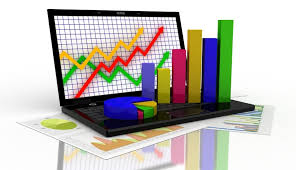

### 2.4.1 Análisis multivariable en este problema
<hr>

Aplicable ya que nuestro conjunto de atributos tiene varios candidatos a ser varaible objetivo, en concreto en el primer paso de la práctica destacamos los siguientes:

+ **PM2.5** (particulas < 2.5 microns)
+ **PM10** (patriculas < 10 microns)
+ **O3** (ozono)
+ **SO2** (dióxido de axufre)
+ **NO2** (dióxido de nitrógeno)
+ **CO** (monóxido de carbono)

Es por esto que como ya comentamos, un análisis exhaustivo podría ser ver como nuestros atributos predictores con capaces de precedir cada uno de estos atributos, que como hemos dicho se usan para determinar la calidad del aire. De manera que nos quedemos con aquel que mejor se ajuste.

Otra opción sería: en caso de que consigamos varios modelos que nos permitan precedir de forma correcta distintos parámetros de calidad del aire, podríamos generar todos estos modelos de manera que obtengamos los indices de calidad del aire según cada partícula de forma independiente. Esto nos da mucha mas pontencia que el caso anterior ya que estamos mostrando la calidad del aire en base a varios atributos.

### 2.4.2 Existe multicolinealidad entre atributos independientes
<hr>

En **"2.2.3 Analisis de Correlaciones"** analizamos si los atributos a pares estaban correlados entre si (*colinealidad o correlación*). Esto nos permite evitar meter a un modelo de regresión dos atributos, de los cuales uno explique al otro, lo cual perjudica al algoritmo.

Para el problema que estamos abordando esto es suficiente ya que las regresiones que hemos aplicado tenian un número bajo de atributos. 

>Cuando esta cifra empieza a aumentar, puede ocurrir que aunque hayamos eliminado todos los atributos colineados, se puede dar el caso que varios atributos de tu regresión expliquen en alguna comibnación lineal entre ellos a otro, esto el lo que llamamos **multicolinealidad**. 

Este problema lógicamente no se puede detectar con la matriz de correlaciónes ya que esta te muestra relaciones entre pares de variables. Veremos, para ello, en **2.4.5 Test de Inflación de la Varianza**.

### 2.4.3 Ajuste polinómico para NO2
<hr>

Para generar el ajuste polinómico vamos a tomar como referencia aquellas varaibles que en los diagramas de dispersión realizados en el apartado **"2.2.4 Atributos más correlados con NO2"** muestren un comportamiento polinómico.

Aquellos que podemos observar con este comportamiento son:
+ T_MIN - T_MAX
+ Viento_MED - Viento_MAX

Englobamos estos 4 atributos en dos grupos, ya que se encuentran fuertemente correlados entre ellos, por lo que vamos a escoger uno de cada grupo para este ajuste.

El comportamiento polinómico que presentan ambos atributos se puede modelar con una curva de grado 2 ya que solo presentan 1 curva.

Un posible modelo por tanto seria usar un ajuste polinómico de grado 2 con la variable *VIENTO_MED* y *T_MAX* que sería el mismo caso que la regresión lineal que mejor resultado nos dio pero en este caso aplicando un ajuste polinómico. 

La ecuación resultante sería la siguiente tomando *VIENTO_MED* = x1 y *T_MAX* = x2

>**f(x1,x2) = a1 * x1 + a2 * x1^2 + a3 * x2 + a4 * x2^2 + c**

In [33]:
X = np.c_[dataframe['Viento_MAX'],dataframe['Viento_MAX'].apply(lambda x : x * x),
          dataframe['T_MAX'],dataframe['T_MAX'].apply(lambda x : x * x)]
y= dataframe['NO2']

regressor = LinearRegression()
rscoreE = 0
rscoreT = 0
kf = KFold(n_splits = 4,shuffle = True,random_state = 100)
for train_index,test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    regressor.fit(X_train, y_train) #training the algorithm
    rscoreT += regressor.score(X_test, y_test)
    rscoreE += regressor.score(X_train, y_train)

print("R2 ENTR: ",rscoreE/4)
print("R2 TEST: ",rscoreT/4)

R2 ENTR:  0.5687496846889751
R2 TEST:  0.5529943695071706


Como podemos ver obtenemos, lógicamente mejores resultados con el ajuste polinómico que con el lineal

### 2.4.4 Modelo de regresión múltiple no lineal basado en árboles
<hr>

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
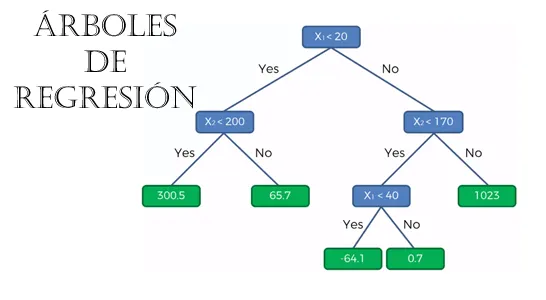

A continuación vamos a generar un árbol de regresión para realizar la regresión. ¿qué ventajas nos va a aportar esta técnica sobre las anteriores?: 

+ Los modelos anteriores, quitando el último de todos, se basaban en buscar regresiones lineales, lo cual limita la estimación bastante. En cambio los árboles de regresión pueden detectar relaciones no lineales.
+ Los árboles tienen su propio criterios de escoger atributos por lo que podemos darle todos los atributos meteorológicos y el escogerá aquellos que mejor discriminen.
+ Pueden tratar tanto atributos categóricos como nominales
+ Nos permiten interpretar de forma muy sencilla la solución

Por otro lado el principar inconveniente es que estos algoritmos tienden a sobreentrenar, por lo que debermeos modificar los hiperparámetros del algoritmo de manera que fijándonos en los resultados de validación, obtengamos el mejor resultado posible.

In [37]:
#Para poder usar los atributos categóricos dentro del árbol de Regresión necesitamos primer codificarlos 
# con números Transformamos el MES
month_encoded = np.arange(dataframe["Mes"].shape[0])
for i,row in enumerate(dataframe["Mes"]):
    if (row =="ENE"): month_encoded[i] = 1
    if (row == "FEB"): month_encoded[i] = 2
    if (row == "MAR"): month_encoded[i] = 3
    if (row == "ABR"): month_encoded[i] = 4
    if (row == "MAY"): month_encoded[i] = 5
    if (row == "JUN"): month_encoded[i] = 6
    if (row == "JUL"): month_encoded[i] = 7
    if (row == "AGO"): month_encoded[i] = 8
    if (row == "SEP"): month_encoded[i] = 9
    if (row == "OCT"): month_encoded[i] = 10
    if (row == "NOV"): month_encoded[i] = 11
    if (row == "DIC"): month_encoded[i] = 12

#Transformamos el DIA DE LA SEMANA
day_encoded = np.arange(dataframe["Mes"].shape[0])
for i,row in enumerate(dataframe["Dia_sem"]):
    if (row == "L"): day_encoded[i] = 1
    if (row == "M"): day_encoded[i] = 2
    if (row == "X"): day_encoded[i] = 3
    if (row == "J"): day_encoded[i] = 4
    if (row == "V"): day_encoded[i] = 5
    if (row == "S"): day_encoded[i] = 6
    if (row == "D"): day_encoded[i] = 7

X = np.c_[dataframe['Viento_MAX'],dataframe['Viento_MED'],dataframe['T_MAX'],dataframe['T_MIN'],
          dataframe['Lluvia'],month_encoded,day_encoded]
y= dataframe['NO2']

regressor = DecisionTreeRegressor(max_depth=5)
rscoreE = 0
rscoreT = 0
kf = KFold(n_splits = 4,shuffle = True,random_state = 100)
for train_index,test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    regressor.fit(X_train, y_train) #training the algorithm
    rscoreT += regressor.score(X_test, y_test)
    rscoreE += regressor.score(X_train, y_train)

print("R2 ENTR: ",rscoreE/4)
print("R2 TEST: ",rscoreT/4)

R2 ENTR:  0.8045381544380907
R2 TEST:  0.542725946264838


Este algoritmo que parecía el más prometedor según todo lo que prometía, pero ha acabado ocurriendo lo que ya explicamos en los inconvenientes del mismo. Es por esto que para mejorar el modelo deberíamos modificarl los hiperparámetros del algoritmo.

### 2.4.5 Test de inflación de la varianza (VIF)
<hr>

Test de factor de inflación de la varianza (FIV) o VIF (*variance inflation factor*) cuantifica la intensidad de la multicolinealidad en un análisis de regresión normal de mínimos cuadrados. Proporciona un índice que mide hasta qué punto la varianza de un coeficiente de regresión estimado se incrementa a causa de la colinealidad.

https://www.ucm.es/data/cont/docs/518-2013-10-25-Tema_4_EctrGrado.pdf

Vamos a realizar este test sobre nuestro conjunto de atributos predictores para ver que resultados obtenemos. En un principio deberíamos poder detectar las mismas correlaciones que en la matriz de correlaciones ya que este método permite detectar colinealidad y multicolinealidad.

https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html

In [38]:
X = np.c_[dataframe['Viento_MAX'],dataframe['Viento_MED'],dataframe['T_MAX'],dataframe['T_MIN'],dataframe['Lluvia']]
vif = pd.DataFrame()
vif["Features"] = ['Viento_MAX','Viento_MED','T_MAX','T_MIN','Lluvia']
vif["VIF Factor"] = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
print(vif)

     Features  VIF Factor
0  Viento_MAX   54.615807
1  Viento_MED   58.623802
2       T_MAX   39.617513
3       T_MIN   27.221034
4      Lluvia    1.155442


Como podemos ver este test nos da para cada uno de los atributos de nuestro problema un valor que nos indicara en base al siguiente criterio si este se encuentra colineado o multicolineado: 
>+ = 1: No hay multicolinealidad 
+ [1,6): Multicolinealidad moderada
+ [6,∞] : multicolinealidad alta

Asi los atributos de *VIENTO* y *TEMPERATURA* muestran la presencia de multicolinealidad. 

En este caso este valor se debe a la correlación simple (*colinealidad*) que tienen entre ellos. Esta correlación fue la que ya detectamos en la matriz de correlaciones.

Es por esto que viendo estos resultados automaticamente podríamos descartar uno de los atribtuos de cada pareja de *VIENTO* y *TEMPERATURA*.

>El único inconventiente de este método es que mediante sus coeficientes te permite detectar que atributos sufren de una alta colinealidad, pero no te permite saber cuales son los artibutos que generan esa colinealidad. Es por esto que la forma de descartar se basa en idenficiar los atributos que tienen valores de inflación similares, de manera que elimines uno de ellos. Esto puede generar problemas en el caso de que varios atributos tengan valores similares.

# PASO 3: Algoritmos de Clasificación
<hr>

## 3.1 Preparación de la variable de salida
<hr>

Hasta ahora todos los modelos que hemos generado eran modelos de regresión por lo que no necesitábamos tranformar nuestra varaible de salida para poder utilizar el alogritmo. 

A continuación vamos a pasar a utilizar modelos de clasificación, por lo que lo primero de todo, deberemos preguntarnos que ventaja nos va a aportar utilizar modelos de clasificación frende a modelos de regersión. Para responder a esa pregunta tenemos que pensar:

¿Queremos saber exactamente el valor de la variable de salida, o se esta se encuentra dentro de un rango que sea saludable, malo o dañino?

En realidad en este caso lo que nos intesera es más lo segundo por lo que un modelo de casifiación que consiga un buen resultado puede ajustarse bastante bien a nuestro problema.

Una vez tenemos esto claro debemos decidir cómo se va a realizar la **discretización** de nuestro campo objetivo; **NO2**. 

>Para ello debemos informarnos de cuales son los rangos que marcan la calidad del aire para este atributo. Además también tendremos que ver en que unidad estan representados estos rangos. Tras investigar un poco sobre ello conseguimos la siguiente información:
+ **[0,53] ppb**    : Buena calidad
+ **[54,100] ppb**  : Calidad media
+ **[101,360] ppb** : Perjudicial para grupos sensibles
+ **[351,500] ppb** : Perjudicial

Con esto conseguimos los rangos en los que discretizar, pero encontramos un problema y es que las unidades en las que están estos rangos son distintas a las que tenemos en los datos (μg/m^3). Es por esto que necesitamos transformar la unidad de nuestra columna *NO2*. La fórmula que nos permite realizar esto es la siguiente:

**(ppb) = (µg/m^3)*(273.15 + °C) / (12.187)*(M)**

Donde:
+ **(µg/m^3)**: Valor de concentración de *NO2* en µg/m^3
+ **°C**      : Temperatura a la que se mide la concentración del compuesto.
+ **(M)**     : Masa molecular del compuesto = 46.0055 g/mol
+ **(ppb)**   : Valor de concentración de *NO2* en ppb

El problema que nos encontrabamos con la tansformación a esta unidad es que como se puede ver en la fórmula es neceario la temperatura. Nosotros tenemos la temperatura máxima y mínima de cada día. De manera que podemos cometer mucha imprecisión a la hora de transformar esta varaible a esa unidad es por ello que lo que realizamos una clasificación en rangos de µg/m^3. Buscando obtuvimos lo siguiente:

>+ **[0,40] µg/m^3**     : Muy Buena calidad
+ **[41,100] µg/m^3**   : Buena calidad
+ **[100,200] µg/m^3**  : Regular
+ **[200,400] µg/m^3**  : Malo
+ **[400,1000] µg/m^3** : Muy Malo

Realmente las dos primeras clases no tiene mucho sentido separarlas ya que la diferencia no es significativa, de hecho separarlas nos podría dar problemas a la hora de clasificar ya que probablemente se confundirían. Es por esto que las vamos a solapar en una que vaya de [0,100]

Con toda esta información recabada estamos solo nos queda realizar un pequeño cambio para poder empezar a discretizar la variable. El problema que nos encontramos es que por un lado tenemos el valor medio de NO2 diario (que se calcula como la media de las tomas cada hora) y por otro lado tenemos el valor del NO2 máximo en ese día. Como ya sabemos, la media es una medida muy engañosa ya que los tus datos pueden distribuirse en los cuartiles de muchas formas ditintas y dar la misma media. Es por ello que lo que vamos a hacer es combinar estos dos atributos en uno solo. La lógica de este nuevo atributo será la siguiente:

Si el valor de NO2_MAX se devía en un 20% a la media, le aplicaremos un aumento propocional a la media. Este aumento proporcional será el 75% de la desviación obtenida anteriormente.

Con esto conseguimos solucionar el problema de que la media no sea significativa, en el caso de días con mucha variación entre los niveles de NO2. De hecho lo que estamos haciendo es, en estos casos, dale a la medida una tendencia negativa. Por lo que vamos a ser más exigentes a la hora de predecir la calidad del aire.

TRANSFORMAMOS LA VARAIBLE NO2 EN FUNCIÓN DE NO2_MAX

In [40]:
target = np.arange(dataframe.shape[0])
for i,row in enumerate(dataframe["NO2"]):
    difference = row/dataframe.loc[i,"NO2_MAX"]
    if(difference < 0.8): target[i] = row * (1 + difference*0.8)
    else: target[i] = row

DISCRETIZAMOS SEGÚN EL ÚLTIMO CRITERIO ESTABLECIDO

In [41]:
# Discretizamos la variable NO2
for i in range(dataframe.shape[0]):
    if(target[i]<=100): target[i]=0
    if(target[i]>100): target[i]=1

Volvemos a visualizar la asignación de clases para comprobar que todo ha funcionado correctamente

In [42]:
target = pd.DataFrame(target,columns=["class"])
target["count"] = 1
print(target.groupby("class").count())
#Eliminamos el atributo de count ya que ya no lo vamos a necesitar más
target = target.drop(["count"],axis = 1)

       count
class       
0        317
1         48


Como podemos ver las clases quedan un poco desbalanceadas, de hecho de las clases peores ni hay datos. Tenemos por tanto con una tendencia clara a las categorías de aire bueno, lo que nos indica que el aire de Madrid tiene buenas calidades según este atributo. En un principio parece que de la clase 1 no tenemos los suficientes datos pero realmente tenemos los suficientes para que si realmente estas clases son significativamente diferentes se pueda diseñar un algoritmo que clasifique correctamente. Cambiar los umbrales de las clases para conseguir que tuviesen la mísma cantidad de datos no tendría sentdio ya que estaríamos perdiendo la lógica de las clases haciendolas asi menos diferenciables y probablemente el algoritmo funcionaría peor.

Con esto ya hemos conseguido la variable a predecir para cada uno de los métodos que vamos a utilizar a continuación. Lo que nos falta por tando es decidir cual va a ser el conjunto de atributos a utilizar, de manera que seleccionemos los mejores (esta selección se explica en el siguiente apartado). Estos atributos a utilizar son los que ya venimos analizando en todo el proceso anterior; los atributos meteorológicos. En el caso del último algoritmo, árbol, entrarán en juego tamibén los atributos categóricos (MES y DIA_SEM) ya que como explicamos anteriormente este algortimo puede utilizar este tipo de atributos.

## 3.2 Análisis de los diagramas de cajas
<hr>

En este apartado lo que vamos a buscar es detectar los atributos que mejor separen las clases que hemos generado anteriormente, de manera que sean los candidatos a usar en los siguientes algoritmos. De estos atributos que mejor comportamiento den, se deberá realizar un segundo filtro, el cual se realizará personalizado en cada algoritmo, ya que nos vamos a fijar en temas como la correlación entre atributos o los outliers, lo cual afecta de ditinta forma a cada algoritmo ya que depende de como funcionen.

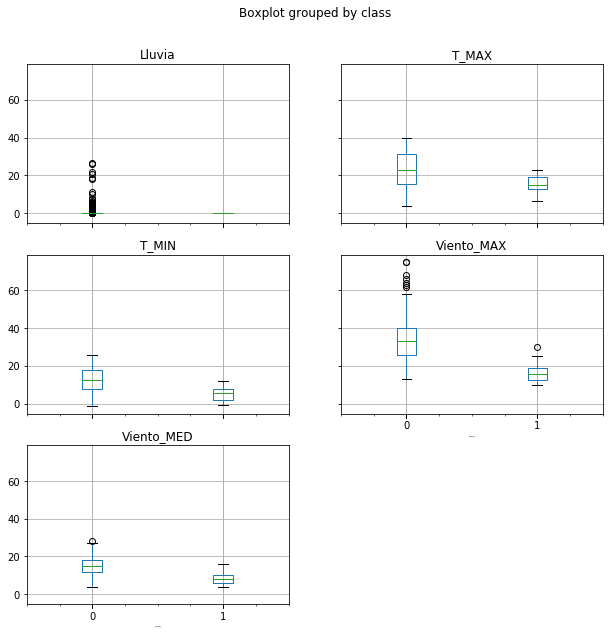

In [43]:
plt.rcParams['axes.labelsize']=2
plt.rcParams['xtick.labelsize']= 10
plt.rcParams['ytick.labelsize']= 10

X = dataframe[['Viento_MAX','Viento_MED','T_MAX','T_MIN','Lluvia','Mes','Dia_sem']]
X = pd.concat([X,target],axis = 1)
X.boxplot(by="class",figsize = (10,10))
plt.show()

Como podemos ver las variables que mejor discriminan las clases que hemos creado son *VIENTO_MED* y *VIENTO_MAX* y *T_MIN*, las cuales llegan a diferenciarlo especialmente bien, por lo que son principales candidatas a ser usadas en los algoritmos. Si que es cierto que se ve la presencia de outliers sobre todo en *VIENTO_MAX* esto debermos tenerlo en cuenta en los algoritmos que sean sensibles a ello. Por otro lado el atributo que queda totalmente descartado el la lluvia ya que no nos aporta nada de información como se puede ver.

Es por esto que los atributos seleccionados en este filtro son: **VIENTO_MAX, VIENTO_MED, T_MIN, T_MAX**

*ANOTACIÓN:* Probamos a realizar los boxplot con 3 clases balanceadas y vimos que la diferenciación era mucho peor por lo que la hipótesis de que modificar las clases para balancearlas iba a empeorar el rendimiento se confirma.

LLegado a este punto la pregunta que nos surgen dos preguntas
1. **¿Por qué el viento discrimina tan bien estas clases?:** Si investigamos como se genera el NO2, vemos que este es un aire que proviene del NO, al combinarse a altas aturas con el oxígeno. En estado normal el compuesto se encuentra como hemos dicho a altas alturas por lo que en principio no nos afecta, en cambio lo que parece que esta ocurriendo es que los días con más viento, se mueve el aire de altas alturas a bajas de manera que el aire se llena de este compuesto, disminuyendo asi la calidad del mismo.
2. **¿Y por qué la temperatura mínima?:** La explicación en este caso es sencilla. Cuanto menores son las temperaturas mínimas, más probable es que haya hecho mucho frío todo el día y que por tanto se enciendan las calefacciónes, las cuales según hemos podido ver, generan este compuesto.

## 3.3 Modelo Regresor Logístico
<hr>

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

El regresor logístico es un algoritmo que si que se ve afectado por la multicolinealidad por lo que debermeos seleccionar atributos que no esten correlados. 

Sin embargo, respecto a los outliers, este clasificador es sensible a los mismos. A pesar de contar con algunos atributos con numerosos *outliers* en el atributo de *VIENTO_MED* estos realmente no afectarán al modelo. 

Visualemente podemos verlo en el diagrama de cajas. Si trazamos una linea horizontal desde el mínimo valor de la case 0 y el máximo (teniendo en cuenta los outliers) vemos que en el area comprendido por estas lineas vemos que no se encuentra ninguna parte del diagrama de cajas de la otra clase por lo que los datos se clasificaran todos como de la clase 0. Si hacemos el mismo proceso pero a la inversa vemos que hay un outlier que si que cae en el diagrama de cajas de la otra clase (clase 0) por lo que se clasificara incorrectamente. Es por esto que podemos decir que la mayoría de los outliers son *buenos* y no afectarán ya que tal como se distribuyen las clases se clasificarán correcamente. 

Teniendo todo esto en cuenta la mejor selección de atributos es la siguiente: **VIENTO_MAX, T_MIN**

In [45]:
rscoreT = 0
rscoreE = 0
model = LogisticRegression(solver='lbfgs')
X = dataframe[['Viento_MAX','T_MIN']]
kf = StratifiedKFold(n_splits = 4,shuffle = True,random_state = 100)
conf_matrix = np.zeros((2,2))
for train_index,test_index in kf.split(X,target):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    model.fit(X_train, np.ravel(y_train)) #training the algorithm
    y_pred = model.predict(X_test)
    conf_matrix += confusion_matrix(y_test,y_pred)
    rscoreT += model.score(X_test, np.ravel(y_test))
    rscoreE += model.score(X_train, np.ravel(y_train))

print("PORCENTAJE DE ACIERTO ENTR: ",rscoreE/4)
print("PORCENTAJE DE ACIERTO TEST: ",rscoreT/4)
print("\nMATRIX DE CONFUSIÓN: ")
conf_matrix = np.around(np.true_divide(conf_matrix, 4),0).astype(int)
print(pd.DataFrame(conf_matrix,columns=["BUENA (P)","REGULAR (P)"],index = ["BUENA (D)","REGULAR (D)"]))

PORCENTAJE DE ACIERTO ENTR:  0.9305967754872865
PORCENTAJE DE ACIERTO TEST:  0.9287804586717631

MATRIX DE CONFUSIÓN: 
             BUENA (P)  REGULAR (P)
BUENA (D)           76            3
REGULAR (D)          4            8


## 3.4 Modelo Naive-Bayes
<hr>

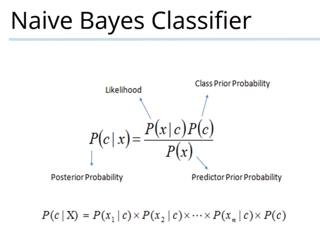

En este caso nos encontramos frente a un clasificador estadístico. Por definición este modelo no será sensible a los outliters en los datos pero si lo será y mucho para los atributos correlados (ya que toma como base que los atributos son independientes entre ellos), por lo que necesitamos que los atributos que le aportemos al modelo no estén correlados. 
Teniendo en cuenta estas características los atributos escogidos son los mismos que anteriormente: **VIENTO_MAX y T_MIN**

In [46]:
rscoreT = 0
rscoreE = 0
model = GaussianNB()
X = dataframe[['Viento_MAX','T_MIN']]
kf = StratifiedKFold(n_splits = 4,shuffle = True,random_state = 100)
conf_matrix = np.zeros((2,2))
for train_index,test_index in kf.split(X,target):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    model.fit(X_train, np.ravel(y_train)) #training the algorithm
    y_pred = model.predict(X_test)
    conf_matrix += confusion_matrix(y_test,y_pred)
    rscoreT += model.score(X_test, np.ravel(y_test))
    rscoreE += model.score(X_train, np.ravel(y_train))

print("PORCENTAJE DE ACIERTO ENTR: ",rscoreE/4)
print("PORCENTAJE DE ACIERTO TEST: ",rscoreT/4)
print("\nMATRIX DE CONFUSIÓN: ")
conf_matrix = np.around(np.true_divide(conf_matrix, 4),0).astype(int)
print(pd.DataFrame(conf_matrix,columns=["BUENA (P)","REGULAR (P)"],index = ["BUENA (D)","REGULAR (D)"]))

PORCENTAJE DE ACIERTO ENTR:  0.9178163685462956
PORCENTAJE DE ACIERTO TEST:  0.9260630673674153

MATRIX DE CONFUSIÓN: 
             BUENA (P)  REGULAR (P)
BUENA (D)           74            5
REGULAR (D)          2           10


## 3.5 Arboles de Decisión
<hr>

Como comentamos anteriormente estos algoritmos no tienen problema con la multicolinealidad entre atributos, por lo que podremos entregarles **todos ellos**, de manera que el discrimine entre ellos. Por otro lado este algoritmo no es sensible a los outliers siempre y cuando estos no sean muy numerosos, pero como ya hemos comentado anteriormente (en la regresión logística), los outliers de este problema no afectan a nuestros modelo.

Teniendo esto en cuenta prodemos pasarle todos los atributos al modelo, ya que este discriminará los mejores de los peores.

In [49]:
X = np.c_[dataframe['Viento_MAX'],dataframe['T_MIN']]

rscoreT = 0
rscoreE = 0
model = DecisionTreeClassifier(max_depth=4)
kf = StratifiedKFold(n_splits = 4,shuffle = True,random_state = 100)
conf_matrix = np.zeros((2,2))
for train_index,test_index in kf.split(X,target):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    model.fit(X_train, y_train) #training the algorithm
    y_pred = model.predict(X_test)
    conf_matrix += confusion_matrix(y_test,y_pred)
    rscoreT += model.score(X_test, np.ravel(y_test))
    rscoreE += model.score(X_train, np.ravel(y_train))

print("PORCENTAJE DE ACIERTO ENTR: ",rscoreE/4)
print("PORCENTAJE DE ACIERTO TEST: ",rscoreT/4)
print("\nMATRIX DE CONFUSIÓN: ")
conf_matrix = np.around(np.true_divide(conf_matrix, 4),0).astype(int)
print(pd.DataFrame(conf_matrix,columns=["BUENA (P)","REGULAR (P)"],index = ["BUENA (D)","REGULAR (D)"]))

PORCENTAJE DE ACIERTO ENTR:  0.9506864789711504
PORCENTAJE DE ACIERTO TEST:  0.8959925943621596

MATRIX DE CONFUSIÓN: 
             BUENA (P)  REGULAR (P)
BUENA (D)           75            4
REGULAR (D)          5            7


## 3.6 Comparaciones
<hr>

Para cada modelos hemos obtenido los resultado de porcentaje de acierto y las matrices de confusión. 

Ambos valores se han tomado en media de las distintas ejecuciones que hemos obtenido de la validación cruzada estratificada, lo cual nos permite tener la seguridad de que los datos que estamos visualizando son más robustos. 

Vemos que el algoritmo que tiene más **tasa de acierto** es el logistico, por lo que en un principio es el principal candidato a ser escogido. Pero debemos mirar primero las *matrices de confusión* para seleccionarlo definitivamente como el mejor. 

>Para ello primero deberemos hacernos una pregunta: que nos interesa más los falsos positivos (aire de buena calidad predicho como regular) o los falsos negativos (aire de calidad regular predicho como buena): opinamos que importan más los falsos negativos por lo que tenemos que mirar si este modelo no descuida demasiado este valor.

Si analizamos como se comportan los algoritmos con respecto a este parámetro vemos que **el que mejor resultado obtiene es el clasifiacador bayesiano** (1 unidad). 

Llegados a este punto necesitariamos más datos para poder discernir entre ambos modelos ya que como podemos ver, la falta de datos de la clase 1 nos esta delimitando a la hora de comparar modelos. Otra opción sería variar el tamaño del conjunto de entrenamiento para tener más datos en validación.

Independientemente de esto, lo que si que podemos afirmar es que parece que tanto el logístico como el bayesiano se comportan mejor que el Árbol, esto probablemente sea por la tendencia que tienen estos algoritmos a sobreentrenar.

# PASO 4: Mejora de los modelos de Clasificación
<hr>

## 4.1 Selección de atributos
<hr>

Realmente la selección de atributos ya ha sido realizada en los apartados anteriorres para los algoritmos de **Regresión Logística** y **Clasificador Gaussiano**. 

Esta selección se realizó en dos pasos:

1. Mirar en el diagrama de cajas para ver cuales eran los atributos que más discriminaban
2. Mirar las correlaciónes y outliers sobre los atributos seleccionados tras el primer filtro, para seleccionar los atributos finales

Con este procedimiento detectamos que los mejores atributos eran: **VIENTO_MAX (recordemos que sus outliers no afectaban) , T_MIN**. 

>De esto podemos concluir que tanto el viento como la temperatura son los atributos meteorológicos que explican el NO2. Sobre esto buscamos información y concluimos que tenía sentido (mirar apartado **3.2 Analsis de los diagrmas de cajas**).


## 4.2 Eliminación de outliers
<hr>

Como hemos explicado anteriormente, el único algoritmo que es sensible a los outliers es el *regresor logístico*. Los outliers que encontramos (en la variable *VIENTO_MED*) por como se distribuian las clases no afectaban al algoritmo, por lo que la eliminación de outliers no va a mejorar en nada nuestro modelo.

## 4.3 Adición/Modificación de atributos
<hr>

Analizamos en los boxplot de los atributos que hicimos previamente. Buscamos mejorar algún atributo de los que no hemos usado para conseguir de esta forma mejorar los resultados finales. Asi:
+ VIENTO_MED: está demasiado correlado con VIENTO_MAX
+ LLUVIA: hay pocos datos distintos de 0 de esta variable 
+ T_MAX: "*Cuanto menores son las temperaturas mínimas, más probable es que haya hecho mucho frío todo el día y que por tanto se enciendan las calefacciónes, las cuales según hemos podido ver, generan este compuesto.*" 

El atributo T_MIN: las temperaturas mínimas pueden haber sido por la noche o durante poco tiempo en el día de manera que la gente no haya encendido la calefacción. Se propone añadirle un atributo que sea la *amplitud térmica del día* de manera que esto sumado al dato temperatura mínima del día, permita estar más seguros de cuando se ha podido encender la calefacción. El nuevo campo a calcular será el siguiente:

> **T_MED = T_MAX - T_MIN** (T_MIN se le hará valor absoluto en caso de que T_MAX y T_MIN tengan valores opuestos)

**NOTA:** 
>La opción de crear un atributo categórico con la información de T_MIN y T_MED, de manera que represente si hay calefacción o no, fue descartada ya que en caso de que etiquetemos mal (encendido cuando en realidad es apagado), dará un error en la clasficiación directamente. Por otro lado, teniendo valores continuos tenemos un margen de error a la hora de clasificar.

Lo primero de todo, transformamos la variable y visualizamos su boxplot para ver si es capaz de diferenciar bien las clases.

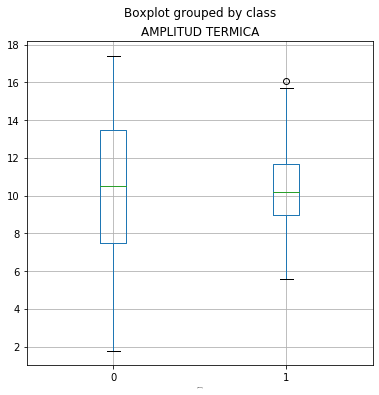

In [53]:
AT = pd.DataFrame(np.arange(dataframe.shape[0]),columns = ['AMPLITUD TERMICA'])

for i,tmax in enumerate(dataframe["T_MAX"]):
    tmin = dataframe.loc[i,"T_MIN"]
    if(tmax < 0): AT.loc[i] = tmax - tmin
    else: AT.loc[i] = tmax - abs(tmin)
    
X = pd.concat([AT,target],axis = 1)
X.boxplot(by="class",figsize = (6,6))
plt.show()

--->> En este caso vemos que el boxplot no diferencia para nada las clases, pero no sabemos que este atributo cobra sentido en conjunción con T_MIN no nos alarma este resultado, y por ello pasamos a realizar las pruebas con el algoritmo de **+regresión logística**.

In [54]:
rscoreT = 0
rscoreE = 0
model = LogisticRegression(solver='lbfgs')
X = pd.concat([dataframe[['Viento_MAX','T_MIN']],AT],axis=1)
kf = StratifiedKFold(n_splits = 4,shuffle = True,random_state = 100)
conf_matrix = np.zeros((2,2))
for train_index,test_index in kf.split(X,target):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    model.fit(X_train, np.ravel(y_train)) #training the algorithm
    y_pred = model.predict(X_test)
    conf_matrix += confusion_matrix(y_test,y_pred)
    rscoreT += model.score(X_test, np.ravel(y_test))
    rscoreE += model.score(X_train, np.ravel(y_train))

print("PORCENTAJE DE ACIERTO ENTR: ",rscoreE/4)
print("PORCENTAJE DE ACIERTO TEST: ",rscoreT/4)
print("\nMATRIX DE CONFUSIÓN: ")
conf_matrix = np.around(np.true_divide(conf_matrix, 4),0).astype(int)
print(pd.DataFrame(conf_matrix,columns=["BUENA (P)","REGULAR (P)"],index = ["BUENA (D)","REGULAR (D)"]))

PORCENTAJE DE ACIERTO ENTR:  0.9452086842597792
PORCENTAJE DE ACIERTO TEST:  0.9480112279025323

MATRIX DE CONFUSIÓN: 
             BUENA (P)  REGULAR (P)
BUENA (D)           77            2
REGULAR (D)          2           10


Como podemos ver tenemos una ligera mejora con la inclusión de este nuevo atributo. Debido a como esta construido el nuevo atributo podemos ver que probablemente hubiesemos obtenido el mismo resultado simplemente añadiento el atributo T_MAX al algoritmo. Pero realmente esto nos ha permitido ver cual es la razón de que  T_MAX y T_MIN haga mejorar el modelo. Con esto de hecho podríamos hacer una formula más sofistiada que nos permita eliminar definitivamente T_MIN y T_MAX de manera que combinemos el conociemiento de ambos en un solo atributo. Una posible opción sería.

T = α*T_MAX + (1- α)*T_MIN (para valores de α menores que 0.5)

Aqui lo que estamos haciendo es exactamente lo que hemos comentado, conmibar la información de ambos atributos en uno solo de manera que le damos más importancia a T_MIN, ya que realmente pese a que por si solo no pueda determinar si se enciende la calefacción o no, siempre es más significativo que T_MAX.